# 作業目標:
    
    建立一個網路模型

# 作業重點:

請修改 Name 中, 自定義的 Layer 名稱

增加一層全連階層

宣告 MODEL API, 分別採用自行定義的 Input/Output Layer

model.summary 查看 Layers stack

In [1]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model

#主要輸入接收新聞標題本身，即一個整數序列（每個整數編碼一個詞）。
#這些整數在1 到10,000 之間（10,000 個詞的詞彙表），且序列長度為100 個詞
#宣告一個 NAME 去定義Input
main_input = Input(shape=(100,), dtype='int32', name='x_input')


# Embedding 層將輸入序列編碼為一個稠密向量的序列，
# 每個向量維度為 512。
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# LSTM 層把向量序列轉換成單個向量，
# 它包含整個序列的上下文信息
# lstm_out = LSTM(32)(x)

In [2]:
#插入輔助損失，使得即使在模型主損失很高的情況下，LSTM 層和Embedding 層都能被平穩地訓練
news_output = Dense(1, activation='sigmoid', name='news_out')(x)

In [4]:
#輔助輸入數據與LSTM 層的輸出連接起來，輸入到模型
import tensorflow.keras as keras
news_input = Input(shape=(5,), name='news_in' , dtype='int32')
x = keras.layers.concatenate([main_input, news_input])


# 堆疊多個全連接網路層
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
#作業解答: 新增兩層
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(128 , activation='relu')(x)

# 最後添加主要的邏輯回歸層
main_output = Dense(1, activation='sigmoid', name='main_output')(x)
model = Model(inputs=[main_input , news_input] , outputs=[main_output , news_output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_input (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
news_in (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 105)          0           x_input[0][0]                    
                                                                 news_in[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 64)           6784        concatenate_1[0][0]        

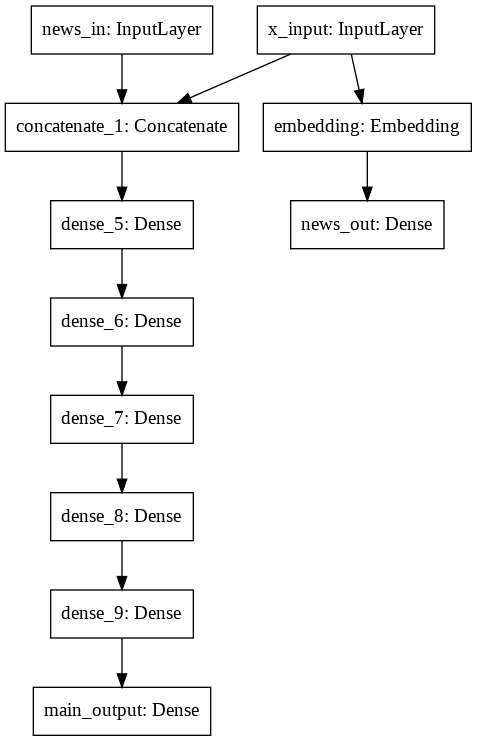

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model , to_file='./model.png')